In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('processed_final.csv')
df.drop(columns = ['Specification'], inplace = True)
df.dropna(inplace=True)
df

,Product Name,Original_Price,Offer_Price,Stars_out_of_5,Ratings,Flipkart_Assured,Color,Reviews,Discount,Brand,5G_Support,Battery_mAh,RAM,ROM,No of Colors
0,POCO C55,13999,6499,4.2,120063,1,"power black, forest green, cool blue",7327,1,poco,0,5000.0,6,128,3
1,Motorola G34 5G,14999,11999,4.2,12852,1,"charcoal black, ice blue, ocean green",1601,1,motorola,1,5000.0,8,128,3
2,Motorola G34 5G,14999,11999,4.2,12852,1,"charcoal black, ice blue, ocean green",1601,1,motorola,1,5000.0,8,128,3
3,POCO C51,9999,5499,4.0,190137,1,"royal blue, power black",10661,1,poco,0,5000.0,4,64,2
4,POCO C51,10999,5999,4.1,7363,1,"royal blue, power black",405,1,poco,0,5000.0,6,128,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,OPPO A33,0,12990,4.4,51890,1,mint cream,3352,0,oppo,0,5000.0,3,32,1
561,vivo X100 Pro,96999,89999,4.7,410,1,asteroid black,126,1,vivo,0,5400.0,16,512,1
562,Tecno Phantom X2 Pro,61999,44998,4.1,14,1,stardust grey,1,1,tecno,0,5160.0,12,256,1
563,itel Vision 3,9271,5990,4.0,765,1,jewel blue,61,1,itel,0,5000.0,3,64,1


# K Nearest Neighbors - Classifier

## Pre Processing

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

encoded = le.fit_transform(df['Product Name'])
df['Product Name'] = encoded
encoded = le.fit_transform(df['Color'])
df['Color'] = encoded

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Brand","Offer_Price", "Color"])  
y = df["Brand"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

accu = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accu)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5929203539823009
Precision: 0.7026825638356092
Recall: 0.5929203539823009
F1 Score: 0.6204143473356329


/Users/pratiksha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pratiksha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualization

Enter Price of the mobile: 30000
Enter the Stars required:  4


/Users/pratiksha/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


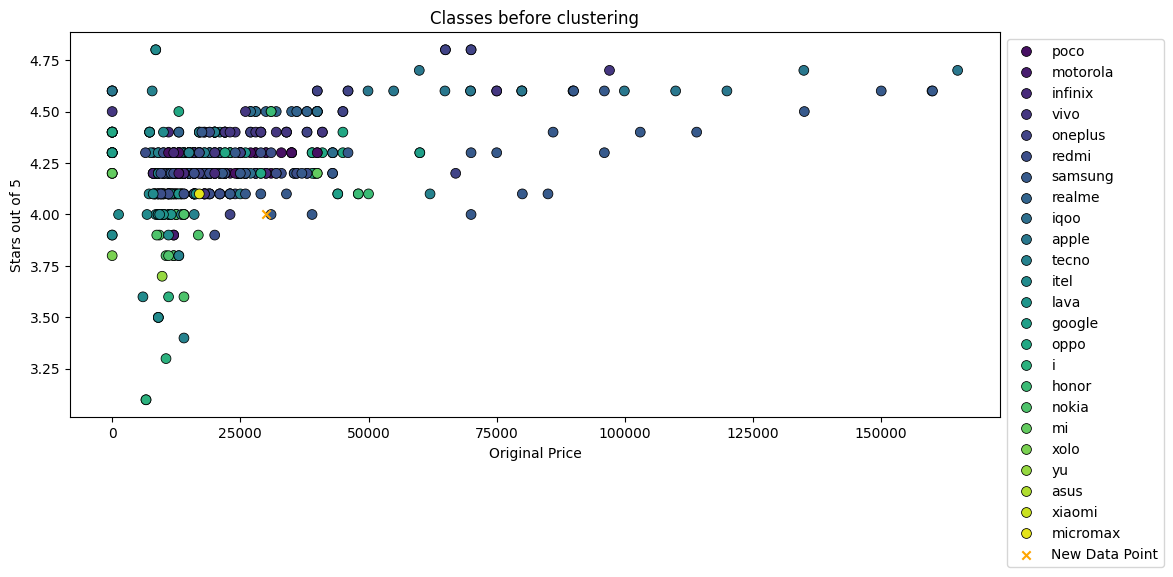

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

price = int(input("Enter Price of the mobile:"))
star = float(input("Enter the Stars required: "))

X = df[['Original_Price', 'Stars_out_of_5']]
y = df['Brand']

k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

new_data_point = [[price, star]] 
predicted_class = knn.predict(new_data_point)

plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='Original_Price', y='Stars_out_of_5', hue='Brand', palette='viridis', s=50, edgecolor='k')
plt.scatter(new_data_point[0][0], new_data_point[0][1], color='orange', marker='x', label='New Data Point')
plt.xlabel('Original Price')
plt.ylabel('Stars out of 5')
plt.title('Classes before clustering')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

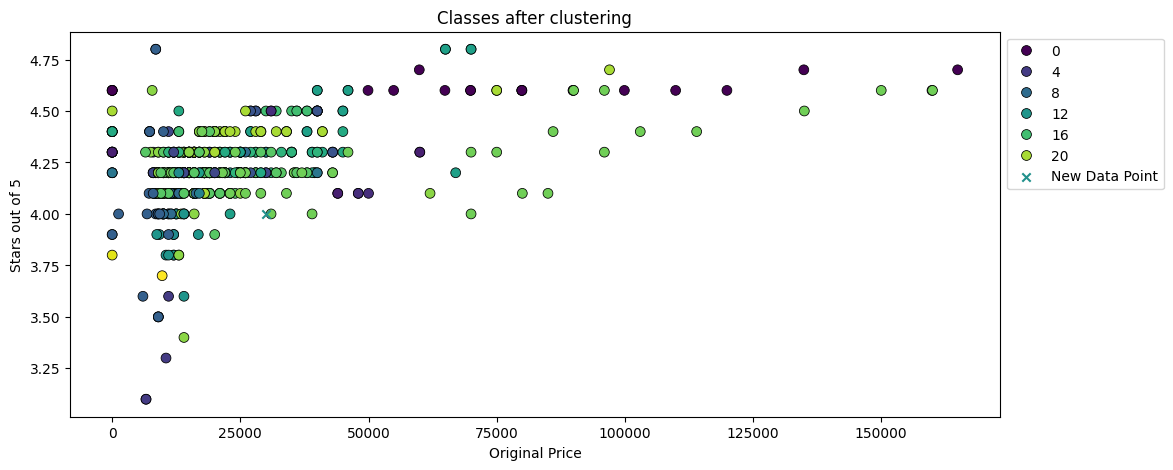

In [14]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='Original_Price', y='Stars_out_of_5', hue='Brand', palette='viridis', s=50, edgecolor='k')
plt.scatter(new_data_point[0][0], new_data_point[0][1], color=[sns.color_palette('viridis', n_colors=len(predicted_class))[0]], marker='x', label='New Data Point')
plt.xlabel('Original Price')
plt.ylabel('Stars out of 5')
plt.title('Classes after clustering')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [15]:
print("Predicted Brand for the New Data Point:", predicted_class[0])

Predicted Brand for the New Data Point: infinix


# K Nearest Neighbors - Regressor

In [16]:
df = pd.read_csv('processed_final.csv')
df.dropna(inplace = True)
df.drop(columns = 'Specification', inplace=True)
df

,Product Name,Original_Price,Offer_Price,Stars_out_of_5,Ratings,Flipkart_Assured,Color,Reviews,Discount,Brand,5G_Support,Battery_mAh,RAM,ROM,No of Colors
0,POCO C55,13999,6499,4.2,120063,1,"power black, forest green, cool blue",7327,1,poco,0,5000.0,6,128,3
1,Motorola G34 5G,14999,11999,4.2,12852,1,"charcoal black, ice blue, ocean green",1601,1,motorola,1,5000.0,8,128,3
2,Motorola G34 5G,14999,11999,4.2,12852,1,"charcoal black, ice blue, ocean green",1601,1,motorola,1,5000.0,8,128,3
3,POCO C51,9999,5499,4.0,190137,1,"royal blue, power black",10661,1,poco,0,5000.0,4,64,2
4,POCO C51,10999,5999,4.1,7363,1,"royal blue, power black",405,1,poco,0,5000.0,6,128,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,OPPO A33,0,12990,4.4,51890,1,mint cream,3352,0,oppo,0,5000.0,3,32,1
561,vivo X100 Pro,96999,89999,4.7,410,1,asteroid black,126,1,vivo,0,5400.0,16,512,1
562,Tecno Phantom X2 Pro,61999,44998,4.1,14,1,stardust grey,1,1,tecno,0,5160.0,12,256,1
563,itel Vision 3,9271,5990,4.0,765,1,jewel blue,61,1,itel,0,5000.0,3,64,1


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

encoded = le.fit_transform(df['Product Name'])
df['Product Name'] = encoded
encoded = le.fit_transform(df['Color'])
df['Color'] = encoded
encoded = le.fit_transform(df['Brand'])
df['Brand'] = encoded

df

,Product Name,Original_Price,Offer_Price,Stars_out_of_5,Ratings,Flipkart_Assured,Color,Reviews,Discount,Brand,5G_Support,Battery_mAh,RAM,ROM,No of Colors
0,110,13999,6499,4.2,120063,1,182,7327,1,15,0,5000.0,6,128,3
1,59,14999,11999,4.2,12852,1,35,1601,1,11,1,5000.0,8,128,3
2,59,14999,11999,4.2,12852,1,35,1601,1,11,1,5000.0,8,128,3
3,108,9999,5499,4.0,190137,1,192,10661,1,15,0,5000.0,4,64,2
4,108,10999,5999,4.1,7363,1,192,405,1,15,0,5000.0,6,128,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,79,0,12990,4.4,51890,1,153,3352,0,14,0,5000.0,3,32,1
561,261,96999,89999,4.7,410,1,7,126,1,20,0,5400.0,16,512,1
562,204,61999,44998,4.1,14,1,215,1,1,19,0,5160.0,12,256,1
563,241,9271,5990,4.0,765,1,124,61,1,7,0,5000.0,3,64,1


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Original_Price', "Color"])  
y = df["Original_Price"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8386099177994102


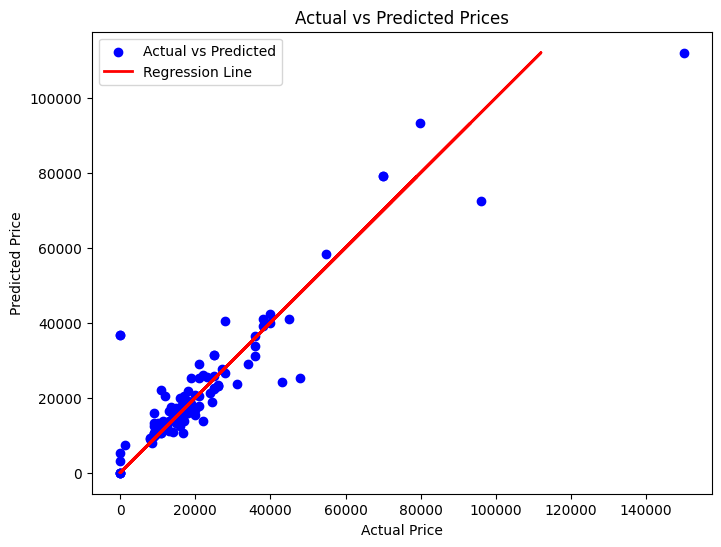

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_pred, y_pred, color='red', linestyle='-', linewidth=2, label='Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

brand = input("Enter brand of the mobile: ")
star = float(input("Enter the Stars required: "))
label_encoder = LabelEncoder()
df['Brand_Code'] = label_encoder.fit_transform(df['Brand'])

X = df[['Brand_Code', 'Stars_out_of_5']]
y = df['Original_Price']

k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)

encoded_brand = le.transform([brand])[0] if brand in le.classes_ else -1
new_data_point = [[encoded_brand, star]]
predicted_price = knn.predict(new_data_point)
print("Predicted Price for the New Data Point:", predicted_price[0])

Enter brand of the mobile:  apple
Enter the Stars required:  4


Predicted Price for the New Data Point: 86566.66666666667


/Users/pratiksha/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# Simple Linear Regression

In [21]:
import numpy as np
x = df['Original_Price']
y = df['Ratings']
n = len(df)

m = (np.sum(x*y) - (np.sum(x)*np.sum(y))/n) / (sum(x**2)-(sum(x)**2)/n)
c = np.mean(y) - m * np.mean(x)

y_hat = []
for i in range(len(x)):
    y_hat.append(c + m*x[i])
y_hat = np.array(y_hat)

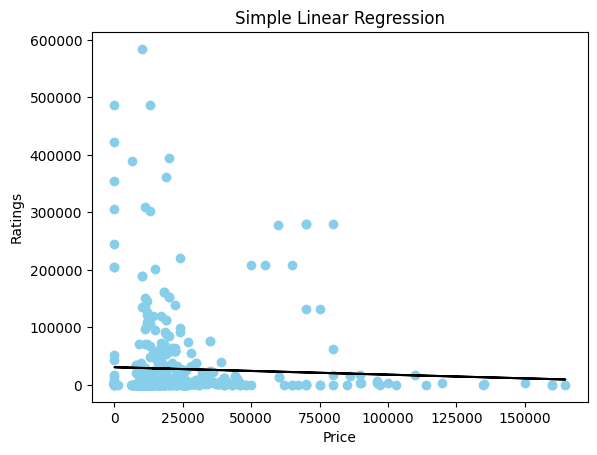

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x,y, color = 'skyblue')
plt.plot(x,y_hat, color = 'black')
plt.title('Simple Linear Regression')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show()

#### From the above plot we can infer that as the price of the mobile increases the number of ratings decreases, as the commo public mostly buy economic priced phones

In [23]:
from pyvis.network import Network
import pandas as pd

# Initialize the network
product_net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white", cdn_resources='in_line')

# Read the data from the CSV
product_data = pd.read_csv("processed_final.csv")

# Extract relevant columns
products = product_data['Product Name']
brands = product_data['Brand']
colors = product_data['Color']
ratings = product_data['Stars_out_of_5']

# Create nodes for products
for i in range(len(products)):
    product = products[i]
    
    # Concatenate brand, color, and rating for the node label
    label = f"{product}"
    
    product_net.add_node(product, label=label)

# Connect nodes based on some logic, here we connect products from the same brand
for i in range(len(products)):
    for j in range(i + 1, len(products)):
        if brands[i] == brands[j]:
            product_net.add_edge(products[i], products[j])

# Show the network
product_net.show("product_network.html")


product_network.html
